In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed, IntSlider, widgets, Play, IntRangeSlider

# Explore suite2p dataset

### loading data

In [2]:
f = np.load("D:/suite2p/plane0/F.npy", allow_pickle = True)
f.shape

(447, 2250)

In [3]:
neuropil = np.load("D:/suite2p/plane0/Fneu.npy", allow_pickle = True)
neuropil.shape

(447, 2250)

In [4]:
spikes = np.load("D:/suite2p/plane0/spks.npy", allow_pickle =True)
spikes.shape

(447, 2250)

In [5]:
stats = np.load("D:/suite2p/plane0/stat.npy", allow_pickle = True)
stats.shape

(447,)

In [6]:
ops = np.load("D:/suite2p/plane0/ops.npy", allow_pickle = True)
ops = ops.item()
ops.keys()

dict_keys(['look_one_level_down', 'fast_disk', 'delete_bin', 'mesoscan', 'bruker', 'h5py', 'h5py_key', 'save_path0', 'save_folder', 'subfolders', 'move_bin', 'nplanes', 'nchannels', 'functional_chan', 'tau', 'fs', 'force_sktiff', 'frames_include', 'multiplane_parallel', 'ignore_flyback', 'preclassify', 'save_mat', 'save_NWB', 'combined', 'aspect', 'do_bidiphase', 'bidiphase', 'bidi_corrected', 'do_registration', 'two_step_registration', 'keep_movie_raw', 'nimg_init', 'batch_size', 'maxregshift', 'align_by_chan', 'reg_tif', 'reg_tif_chan2', 'subpixel', 'smooth_sigma_time', 'smooth_sigma', 'th_badframes', 'norm_frames', 'force_refImg', 'pad_fft', 'nonrigid', 'block_size', 'snr_thresh', 'maxregshiftNR', '1Preg', 'spatial_hp', 'spatial_hp_reg', 'spatial_hp_detect', 'pre_smooth', 'spatial_taper', 'roidetect', 'spikedetect', 'anatomical_only', 'cellprob_threshold', 'flow_threshold', 'sparse_mode', 'diameter', 'spatial_scale', 'connected', 'nbinned', 'max_iterations', 'threshold_scaling', 'ma

In [7]:
iscell =np.load("D:/suite2p/plane0/iscell.npy", allow_pickle = True)
iscell.shape

(447, 2)

# Plotting

### filter for iscell

In [19]:
nice_cells = f[np.where(iscell[:,0]==1)]

In [21]:
nice_stats = stats[np.where(iscell[:,0]==1)]

In [24]:
nice_cell_spikes = spikes[np.where(iscell[:,0]==1)]

### activity of 1st cell

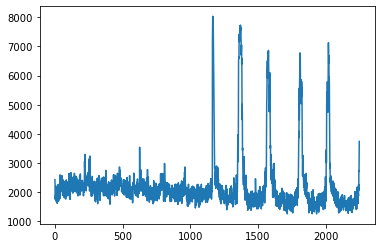

In [8]:
plt.plot(f[0])

### slider for spikes of all cells

In [22]:
@interact(index=IntSlider(value=0,min=0,max=spikes.shape[0]-1))
def plot_spikes(index):
    plt.plot(spikes[index])

interactive(children=(IntSlider(value=0, description='index', max=446), Output()), _dom_classes=('widget-inter…

### slider for spikes of selected cells

In [25]:
@interact(index=IntSlider(value=0,min=0,max=nice_cell_spikes.shape[0]-1))
def plot_spikes(index):
    plt.plot(nice_cell_spikes[index])

interactive(children=(IntSlider(value=0, description='index', max=57), Output()), _dom_classes=('widget-intera…

## Overview plots

### all cells fluorescence

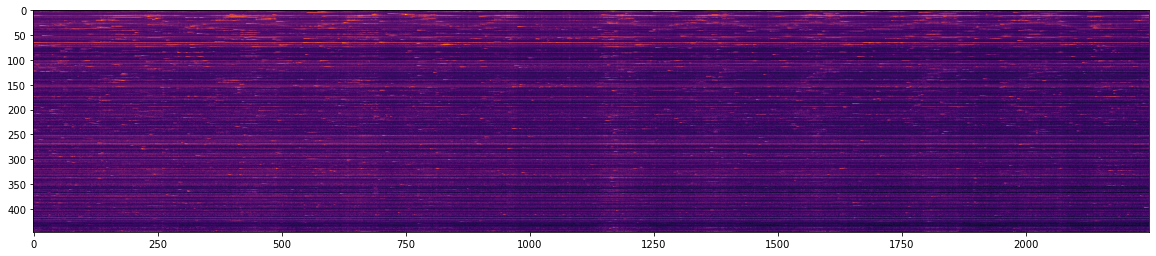

In [10]:
plt.figure(figsize=(20,5))
plt.imshow(f,cmap="inferno")

### neuropil fluorescence

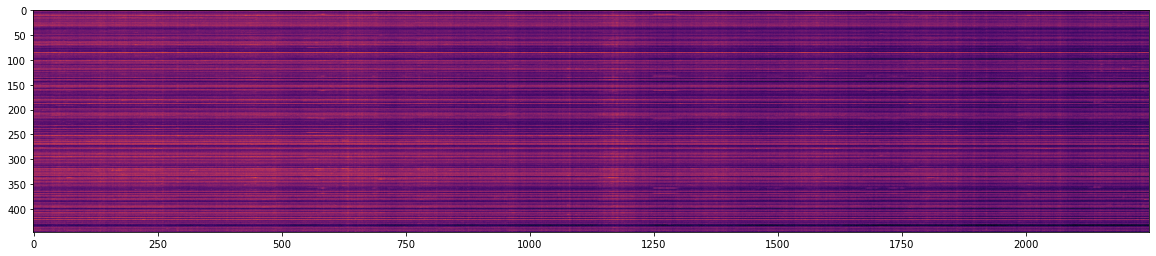

In [11]:
plt.figure(figsize=(20,5))
plt.imshow(neuropil,cmap="inferno")

### selected cells fluorescence

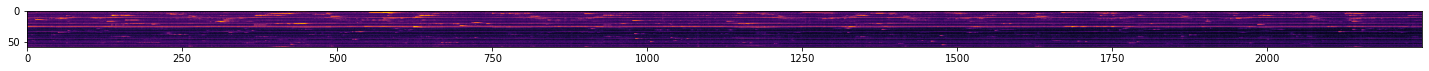

In [16]:
plt.figure(figsize=(25,15))
plt.imshow(nice_cells,cmap="inferno");

## ROI shape of single cells

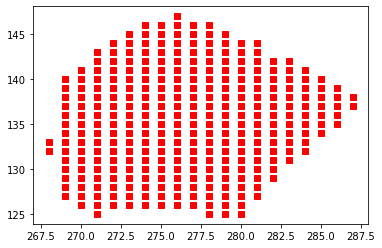

In [28]:
plt.plot(stats[1]["xpix"], stats[1]["ypix"], "rs");

### ROIs all cells

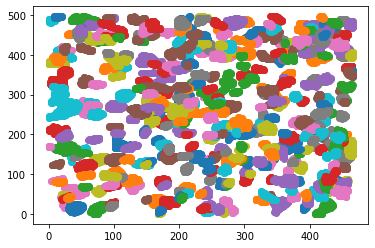

In [17]:
for x in range(0,len(stats)):
    plt.plot(stats[x]["xpix"], stats[x]["ypix"], "o");

### ROI slider all cells

In [18]:
@interact(index = IntSlider(value=0, min = 0, max=stats.shape[0]-1))
def plot_spikes(index):
    plt.xlim([0, 550]),plt.ylim([0,550])
    plt.plot(stats[index]["xpix"], stats[index]["ypix"], "s", markersize=10);

interactive(children=(IntSlider(value=0, description='index', max=446), Output()), _dom_classes=('widget-inter…

### ROI slider selected cells

In [26]:
@interact(index = IntSlider(value=0, min = 0, max=nice_stats.shape[0]-1))
def plot_spikes(index):
    plt.xlim([0, 550]),plt.ylim([0,550])
    plt.plot(nice_stats[index]["xpix"], nice_stats[index]["ypix"], "s", markersize=10);

interactive(children=(IntSlider(value=0, description='index', max=57), Output()), _dom_classes=('widget-intera…

## END OF REPORT!!!!!!!!!